In [19]:
import vk_api

vk_session = vk_api.VkApi(login, password)
vk_session.auth()

vk = vk_session.get_api()


········


In [152]:
friends = vk.friends.get(user_id = "57272392", fields = ["is_closed", "city"])
friends

{'count': 383,
 'items': [{'id': 90601,
   'first_name': 'Илья',
   'last_name': 'Широколобов',
   'is_closed': False,
   'can_access_closed': True,
   'sex': 2,
   'city': {'id': 2, 'title': 'Санкт-Петербург'},
   'online': 1},
  {'id': 132777,
   'first_name': 'Ирина',
   'last_name': 'Засыпкина',
   'is_closed': False,
   'can_access_closed': True,
   'sex': 1,
   'city': {'id': 1, 'title': 'Москва'},
   'online': 0},
  {'id': 166125,
   'first_name': 'Игорь',
   'last_name': 'Говорун',
   'is_closed': False,
   'can_access_closed': True,
   'sex': 2,
   'city': {'id': 1, 'title': 'Москва'},
   'online': 0},
  {'id': 201876,
   'first_name': 'Алина',
   'last_name': 'Михайловская',
   'is_closed': False,
   'can_access_closed': True,
   'sex': 1,
   'online': 0},
  {'id': 313543,
   'first_name': 'Дарья',
   'last_name': 'Пендюр',
   'is_closed': False,
   'can_access_closed': True,
   'sex': 1,
   'city': {'id': 1, 'title': 'Москва'},
   'online': 0},
  {'id': 474260,
   'first_nam

In [197]:
import networkx as nx
G = nx.Graph()

G.add_node(57272392)

for i in range(383):
    if (not ('deactivated' in friends['items'][i]) and not friends['items'][i]['is_closed']):
        G.add_node(friends['items'][i]['id'])
        G.add_edge(57272392, friends['items'][i]['id'])
        if ('city' in friends['items'][i]):
            G.nodes[friends['items'][i]['id']]['city'] = friends['items'][i]['city']['title']

for i in range(383):
    if (not ('deactivated' in friends['items'][i]) and not friends['items'][i]['is_closed']):
        mutual = vk.friends.getMutual(target_uid = friends['items'][i]['id'])
        for j in range(len(mutual)):
            if (mutual[j] in list(G)):
                G.add_edge(friends['items'][i]['id'], mutual[j])
        

In [198]:
nx.write_gexf(G, "test.gexf")

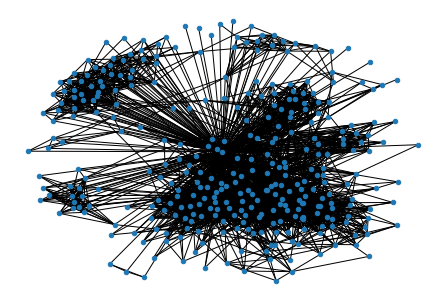

In [199]:
nx.draw_spring(G, node_size = 20)

In [200]:
edges = G.size()
edges

2838

In [201]:
nodes = G.order()
nodes

332

In [202]:
degrees = dict(nx.degree(G)).values()

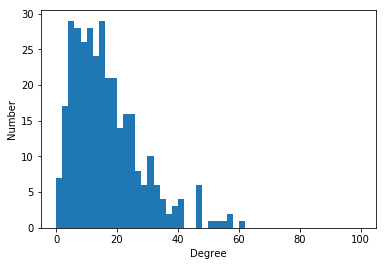

In [203]:
import matplotlib.pyplot as plt
plt.xlabel('Degree')
plt.ylabel('Number')
plt.hist(degrees, 50, range = (0, 100))
plt.show()

In [204]:
G_without_me = G.copy()
G_without_me.remove_node(57272392)

shortest_path_dict = dict(nx.shortest_path_length(G_without_me))

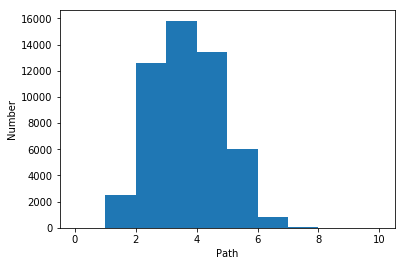

In [205]:
shortest_path_dist = []
for i in range(len(G_without_me)):
    for j in range(i + 1, len(G_without_me)):
        if (list(G_without_me)[j] in shortest_path_dict[list(G_without_me)[i]]):
            shortest_path_dist.append(shortest_path_dict[list(G_without_me)[i]][list(G_without_me)[j]])

plt.xlabel('Path')
plt.ylabel('Number')
plt.hist(shortest_path_dist, 10, range = (0, 10))
plt.show()

In [206]:
diameter = nx.diameter(G)
diameter

2

In [207]:
radius = nx.radius(G)
radius

1

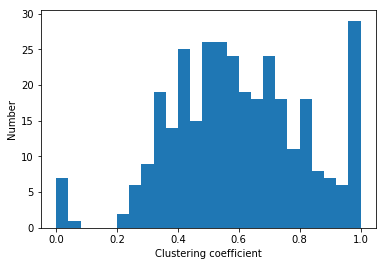

In [208]:
clustering = nx.clustering(G)
plt.xlabel('Clustering coefficient')
plt.ylabel('Number')
plt.hist(clustering.values(), 25)
plt.show()

In [209]:
average_clustering = nx.average_clustering(G)
average_clustering

0.6012557112927448

In [210]:
degree_centralities = nx.degree_centrality(G)
degree_centralities

{57272392: 1.0,
 90601: 0.01812688821752266,
 132777: 0.12084592145015105,
 166125: 0.021148036253776436,
 201876: 0.021148036253776436,
 313543: 0.13897280966767372,
 474260: 0.10876132930513595,
 530369: 0.09667673716012085,
 823454: 0.1027190332326284,
 1049115: 0.03323262839879154,
 1357091: 0.04833836858006042,
 1361641: 0.07854984894259819,
 1548395: 0.01812688821752266,
 1781515: 0.03625377643504532,
 2066674: 0.04833836858006042,
 2261503: 0.054380664652567974,
 2361256: 0.1510574018126888,
 2475947: 0.00906344410876133,
 2560735: 0.04229607250755287,
 2615124: 0.09667673716012085,
 2910104: 0.08459214501510574,
 3117685: 0.06948640483383686,
 3199276: 0.06948640483383686,
 3240642: 0.045317220543806644,
 3309745: 0.00906344410876133,
 3400584: 0.006042296072507553,
 3896768: 0.07250755287009064,
 4051470: 0.0513595166163142,
 4381467: 0.16314199395770393,
 4678883: 0.04229607250755287,
 4737352: 0.0634441087613293,
 5113115: 0.07250755287009064,
 5235860: 0.05740181268882175,


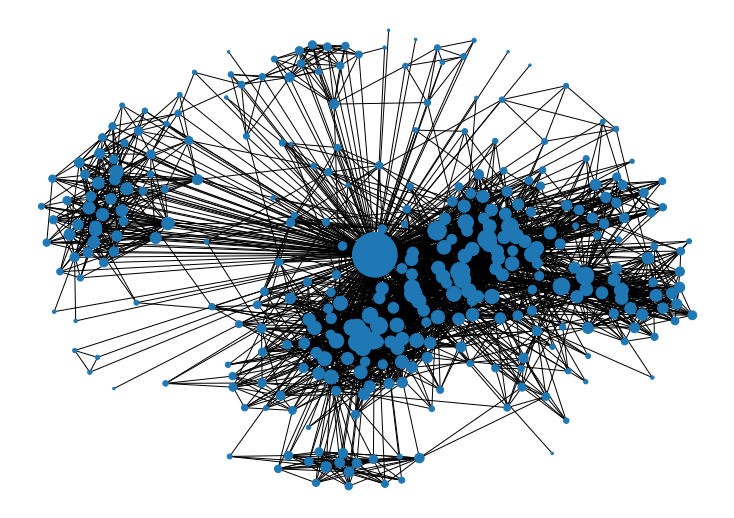

In [211]:
plt.figure(figsize = (10,7))
nx.draw(G, node_size = [d * 2000 for d in degree_centralities.values()],)

In [212]:
# G.nodes[0]["deg"] = 0.23

In [213]:
closeness_centralities = nx.closeness_centrality(G)
closeness_centralities

{57272392: 1.0,
 90601: 0.5045731707317073,
 132777: 0.5321543408360129,
 166125: 0.5053435114503817,
 201876: 0.5053435114503817,
 313543: 0.5373376623376623,
 474260: 0.5287539936102237,
 530369: 0.5253968253968254,
 823454: 0.5270700636942676,
 1049115: 0.5084485407066052,
 1357091: 0.5123839009287926,
 1361641: 0.5204402515723271,
 1548395: 0.5045731707317073,
 1781515: 0.5092307692307693,
 2066674: 0.5123839009287926,
 2261503: 0.5139751552795031,
 2361256: 0.5408496732026143,
 2475947: 0.5022761760242792,
 2560735: 0.5108024691358025,
 2615124: 0.5253968253968254,
 2910104: 0.5220820189274448,
 3117685: 0.5179968701095462,
 3199276: 0.5179968701095462,
 3240642: 0.5115919629057187,
 3309745: 0.5022761760242792,
 3400584: 0.5015151515151515,
 3896768: 0.5188087774294671,
 4051470: 0.5131782945736434,
 4381467: 0.5444078947368421,
 4678883: 0.5108024691358025,
 4737352: 0.516380655226209,
 5113115: 0.5188087774294671,
 5235860: 0.5147744945567652,
 6154817: 0.533011272141707,
 6262

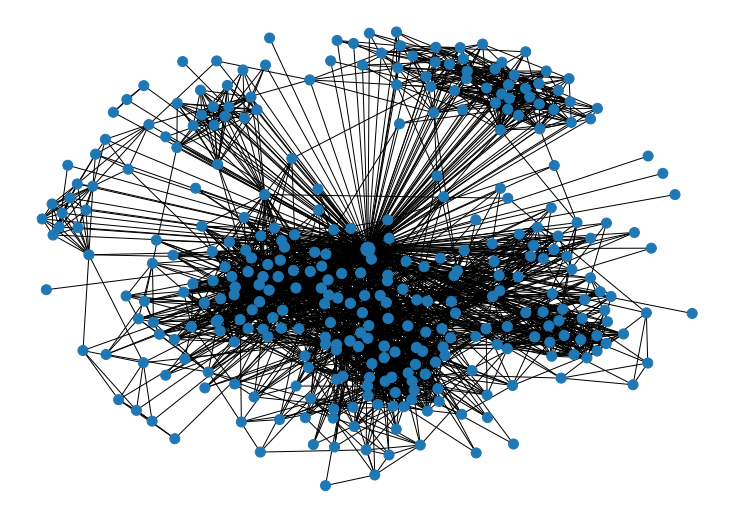

In [214]:
plt.figure(figsize = (10,7))
nx.draw(G, node_size = [(d * 200) for d in closeness_centralities.values()],)

In [215]:
betweenness_centralities = nx.betweenness_centrality(G)
betweenness_centralities

{57272392: 0.8043983248870635,
 90601: 7.374856317454504e-06,
 132777: 0.00144665473224463,
 166125: 2.10564863132839e-05,
 201876: 2.441331746467698e-05,
 313543: 0.0024330359596310756,
 474260: 0.0023508886060382905,
 530369: 0.0023191882559163344,
 823454: 0.001389827285791549,
 1049115: 7.711456408485342e-06,
 1357091: 0.00024260641647293326,
 1361641: 0.0005350708221627908,
 1548395: 5.5891623334310375e-06,
 1781515: 3.287078815779722e-05,
 2066674: 0.00010123534292718584,
 2261503: 0.0002699418003471511,
 2361256: 0.0038419194745642833,
 2475947: 0.0,
 2560735: 8.93940354253455e-05,
 2615124: 0.0009745017180353304,
 2910104: 0.00043867588651877996,
 3117685: 0.00022019419266161095,
 3199276: 0.00029556188518913516,
 3240642: 0.00011160505804834287,
 3309745: 9.154994049253868e-06,
 3400584: 0.0,
 3896768: 0.0008254173730691172,
 4051470: 0.0002963175045020691,
 4381467: 0.0034739648518694022,
 4678883: 3.450990199136313e-05,
 4737352: 0.00038055716663981844,
 5113115: 0.000465722

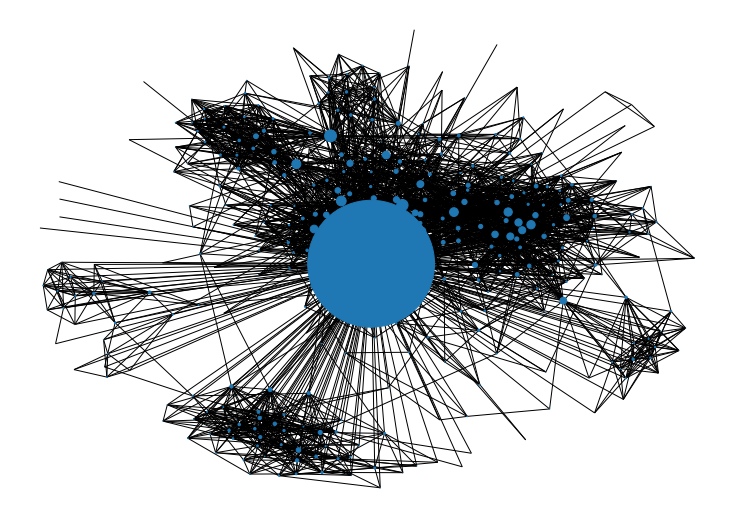

In [216]:
plt.figure(figsize = (10,7))
nx.draw(G, node_size = [(d * 20000) for d in betweenness_centralities.values()],)

In [217]:
page_rank = nx.pagerank(G)
page_rank

{57272392: 0.06023998198847359,
 90601: 0.0013306248301933644,
 132777: 0.005686847995495554,
 166125: 0.0017051399311766476,
 201876: 0.0014534132901312695,
 313543: 0.0065139149026140954,
 474260: 0.005225119761590733,
 530369: 0.005409753176941663,
 823454: 0.004879186312414199,
 1049115: 0.001887711298404524,
 1357091: 0.0026094519466287698,
 1361641: 0.003864213615079572,
 1548395: 0.0012337160807413777,
 1781515: 0.002661131857167818,
 2066674: 0.0034488846568538293,
 2261503: 0.002816307111242069,
 2361256: 0.006997439160681105,
 2475947: 0.0008914582395673247,
 2560735: 0.0022916636965628076,
 2615124: 0.004611681471890895,
 2910104: 0.0041012332679376835,
 3117685: 0.003466731281498399,
 3199276: 0.0035017584685878415,
 3240642: 0.0026465700160389037,
 3309745: 0.00104278536693191,
 3400584: 0.0008384725768216852,
 3896768: 0.003973554719241753,
 4051470: 0.0029108518704524123,
 4381467: 0.0075975905628919834,
 4678883: 0.0022323010147865,
 4737352: 0.0032191843678950173,
 511

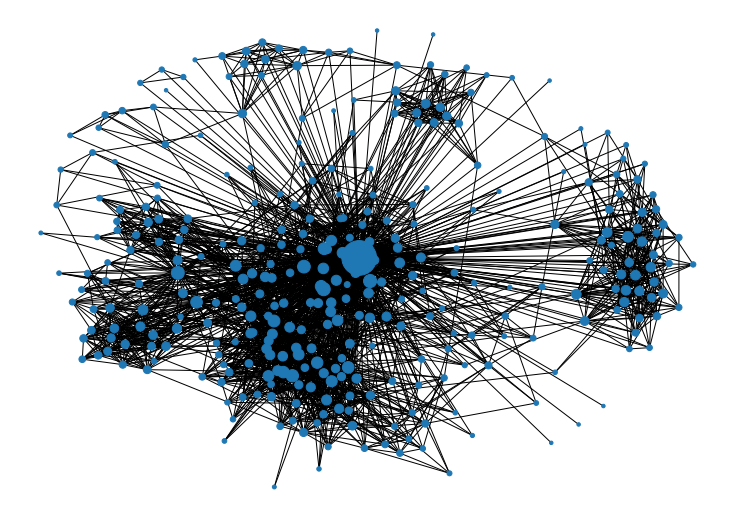

In [218]:
plt.figure(figsize = (10,7))
nx.draw(G, node_size = [(d * 20000) for d in page_rank.values()],)

In [219]:
degree_assortativity_coefficient = nx.degree_assortativity_coefficient(G)
degree_assortativity_coefficient


-0.1093087370386596

In [220]:
attribute_assortativity_coefficient = nx.attribute_assortativity_coefficient(G, 'city')
attribute_assortativity_coefficient

0.03291119386371459